/tmp/ipykernel_2662990/588287357.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choice_model['Effect'] = df_choice_model['Effect'].replace(d)


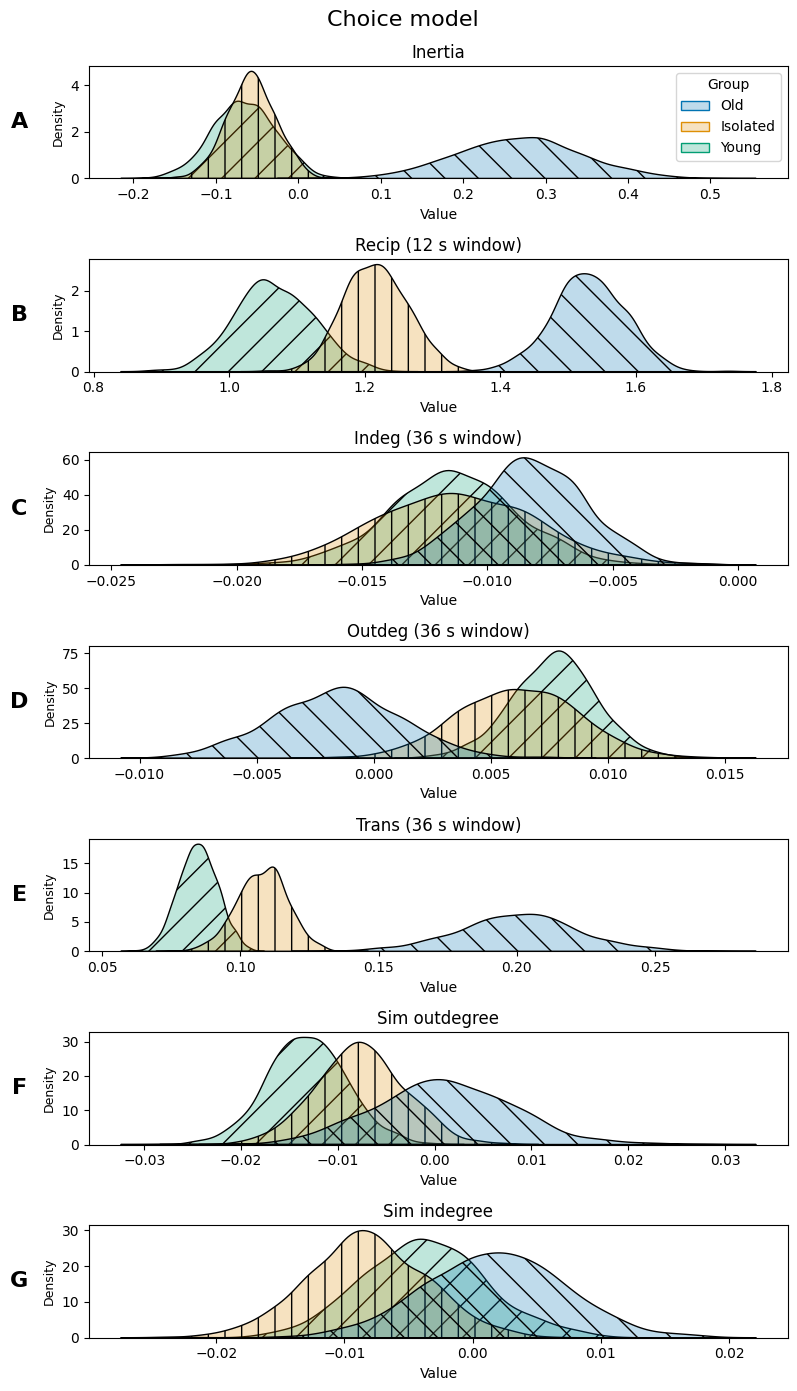

/tmp/ipykernel_2662990/588287357.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate_model['Effect'] = df_rate_model['Effect'].replace(d)


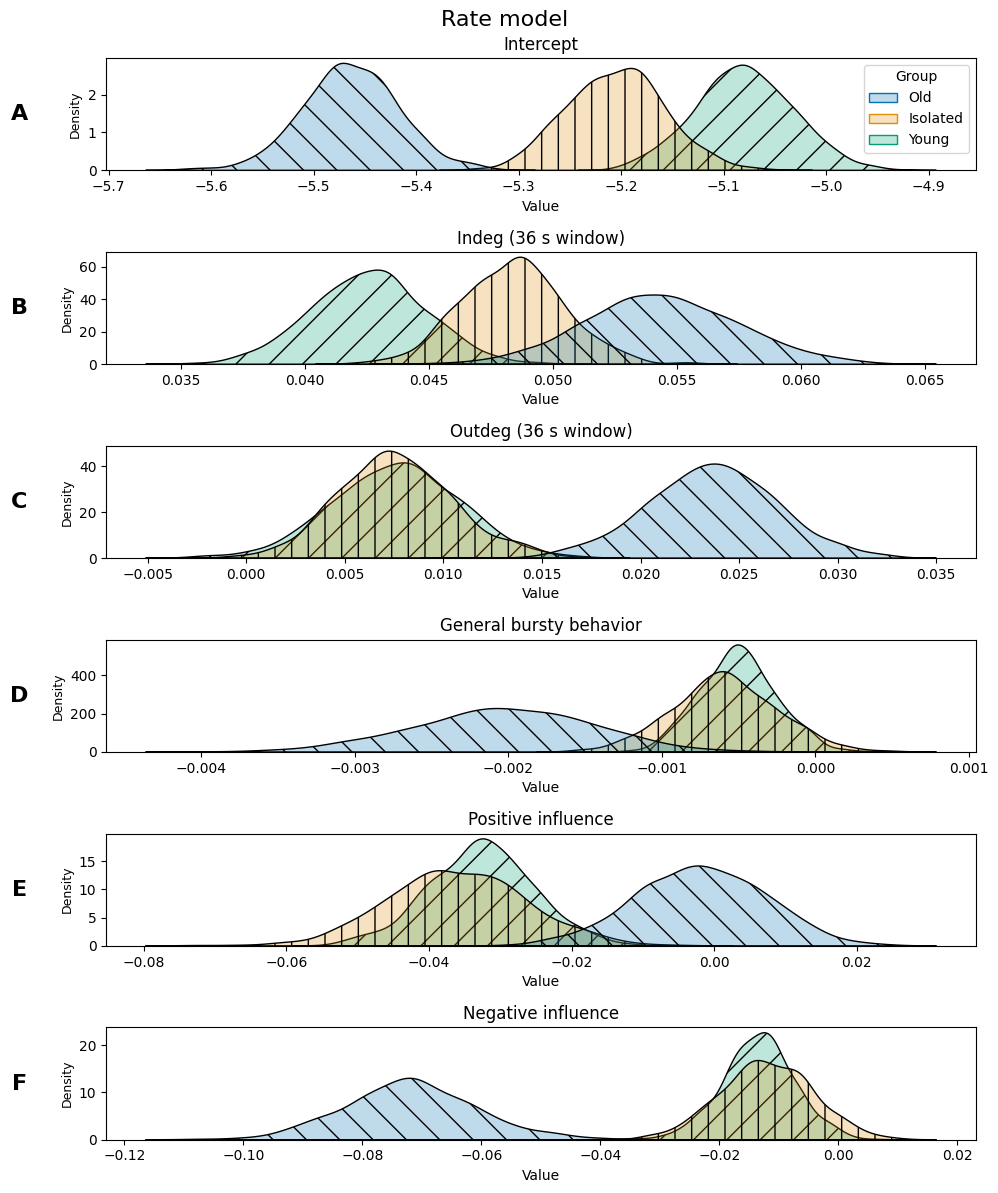

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Bayesian_results = pd.read_excel("/home/milky/sci/drosophila-isolation/r-scripts/res/Bayesian_results.xlsx")
df = Bayesian_results
df.set_index(["effect_name", "network_type"], inplace=True)
num_samples = 1000  # Number of samples per distribution
simulated_data = []

for i, row in enumerate(df.iterrows()):
    idx, row = row
    effect_name, network_type = idx
    samples = np.random.normal(row["posterior_mean"], row["est_error"], num_samples)
    simulated_data.append(pd.DataFrame({"Value": samples, "Group": network_type, "Effect": effect_name})) 

df = pd.concat(simulated_data)
d = {
    "CS_10D": "Old",
    "Cs_5DIZ": "Isolated",
    "CsCh": "Young",
}
df['Group'] = df['Group'].replace(d)

df_rate_model = df[df['Effect'].str.contains('rate_model', case=False)]
df_choice_model = df[df['Effect'].str.contains('choice_model', case=False)]

d = {
    "choice_model_inertia": "Inertia",
    "choice_model_recip_w288": "Recip (12 s window)",
    "choice_model_indeg_w864": "Indeg (36 s window)",
    "choice_model_outdeg_w864": "Outdeg (36 s window)",
    "choice_model_trans_w864": "Trans (36 s window)",
    "choice_model_sim_activity": "Sim outdegree",
    "choice_model_sim_popularity": "Sim indegree",
}


patterns = ['/', '|', '\\']

df_choice_model['Effect'] = df_choice_model['Effect'].replace(d)
effect_names = df_choice_model['Effect'].unique()
num_effects = len(effect_names)
fig, axes = plt.subplots(nrows=num_effects, figsize=(8, num_effects * 2))
# fig.suptitle('Choice model', fontsize=16, y=0.99)

for idx, effect in enumerate(effect_names):
    if idx == 0:
        subset_df = df_choice_model[df_choice_model['Effect'] == effect]
        letter_label = chr(65 + idx)
        axes[idx].text(-0.1, 0.5, letter_label, fontsize=16, weight='bold', va='center', ha='center', transform=axes[idx].transAxes)
        sns.kdeplot(data=subset_df, x='Value', hue='Group', fill=True, ax=axes[idx], legend=True, palette='colorblind')

        for i, patch in enumerate(axes[idx].collections):
            patch.set_edgecolor('black')  # Set the edge color to black for better visibility
            patch.set_hatch(patterns[i])

        axes[idx].set_title(f"{effect}", fontsize=12)
        axes[idx].set_ylabel("Density", fontsize=9)


    else:
        subset_df = df_choice_model[df_choice_model['Effect'] == effect]
        letter_label = chr(65 + idx)
        axes[idx].text(-0.1, 0.5, letter_label, fontsize=16, weight='bold', va='center', ha='center', transform=axes[idx].transAxes)

        sns.kdeplot(data=subset_df, x='Value', hue='Group', fill=True, ax=axes[idx], legend=False, palette='colorblind')

        for i, patch in enumerate(axes[idx].collections):
            patch.set_edgecolor('black')  # Set the edge color to black for better visibility
            patch.set_hatch(patterns[i])

        axes[idx].set_title(f"{effect}", fontsize=12)
        axes[idx].set_ylabel("Density", fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust space to accommodate the suptitle

plt.savefig('figures/choice_model_bayes.svg', dpi=500)
plt.savefig('figures/choice_model_bayes.png', dpi=500)
plt.show()

d = {
    'rate_model_1': "Intercept",
    'rate_model_indeg_w864': "Indeg (36 s window)",
    'rate_model_outdeg_w864': "Outdeg (36 s window)",
    'rate_model_ego_bursty': "General bursty behavior",
    'rate_model_ego_influence_pos': "Positive influence",
    'rate_model_ego_influence_neg': "Negative influence",
}

df_rate_model['Effect'] = df_rate_model['Effect'].replace(d)
effect_names = df_rate_model['Effect'].unique()
num_effects = len(effect_names)
fig, axes = plt.subplots(nrows=num_effects, figsize=(10, num_effects * 2))
# fig.suptitle('Rate model', fontsize=16, y=0.99)


for idx, effect in enumerate(effect_names):
    if idx == 0:
        subset_df = df_rate_model[df_rate_model['Effect'] == effect]
        letter_label = chr(65 + idx)
        axes[idx].text(-0.1, 0.5, letter_label, fontsize=16, weight='bold', va='center', ha='center', transform=axes[idx].transAxes)
        sns.kdeplot(data=subset_df, x='Value', hue='Group', fill=True, ax=axes[idx], legend=True, palette='colorblind')

        for i, patch in enumerate(axes[idx].collections):
            patch.set_edgecolor('black')  # Set the edge color to black for better visibility
            patch.set_hatch(patterns[i])

        axes[idx].set_title(f"{effect}", fontsize=12)
        axes[idx].set_ylabel("Density", fontsize=9)

    else:
        subset_df = df_rate_model[df_rate_model['Effect'] == effect]
        letter_label = chr(65 + idx)
        axes[idx].text(-0.1, 0.5, letter_label, fontsize=16, weight='bold', va='center', ha='center', transform=axes[idx].transAxes)
        sns.kdeplot(data=subset_df, x='Value', hue='Group', fill=True, ax=axes[idx], legend=False, palette='colorblind')

        for i, patch in enumerate(axes[idx].collections):
            patch.set_edgecolor('black')  # Set the edge color to black for better visibility
            patch.set_hatch(patterns[i])

        axes[idx].set_title(f"{effect}", fontsize=12)
        axes[idx].set_ylabel("Density", fontsize=9)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust space to accommodate the suptitle
plt.savefig('figures/rate_model_bayes.svg', dpi=500)
plt.savefig('figures/rate_model_bayes.png', dpi=500)
plt.show()

<ipython-input-7-54bfcc42eace>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_choice_model['Effect'] = df_choice_model['Effect'].replace(choice_model_mapping)
<ipython-input-7-54bfcc42eace>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Effect'] = df_model['Effect'].replace(effect_mapping) if effect_mapping else df_model['Effect']


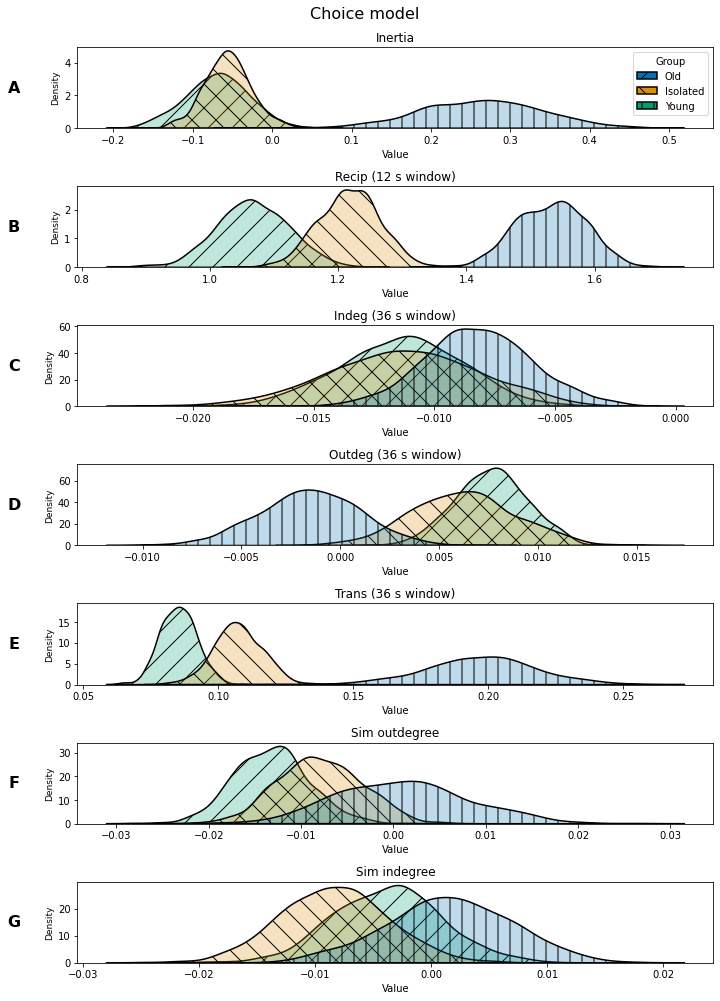

<ipython-input-7-54bfcc42eace>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Effect'] = df_model['Effect'].replace(effect_mapping) if effect_mapping else df_model['Effect']


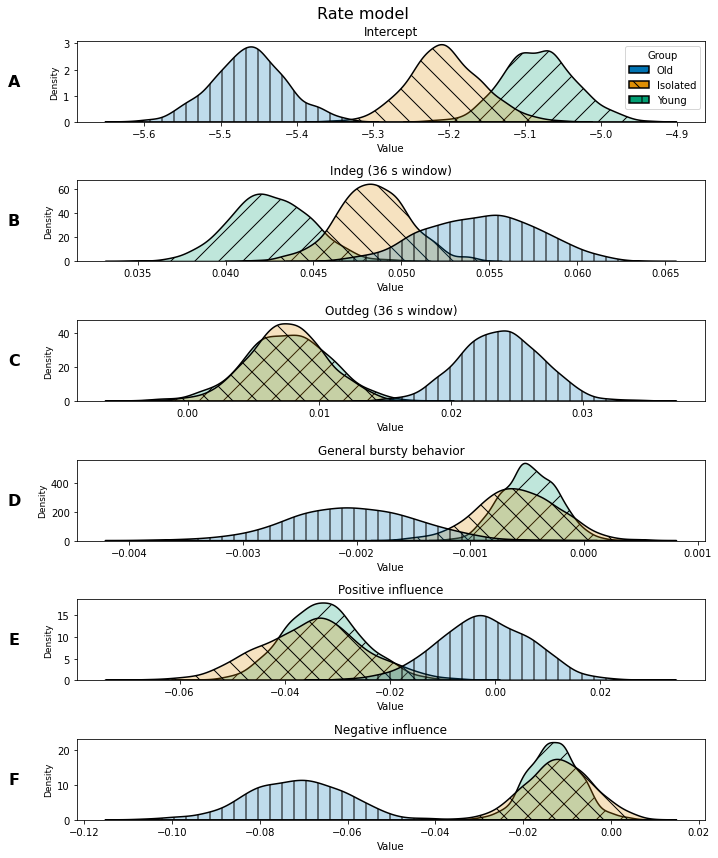

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load data
Bayesian_results = pd.read_excel("/home/milky/sci/drosophila-isolation/r-scripts/res/Bayesian_results.xlsx")
df = Bayesian_results
df.set_index(["effect_name", "network_type"], inplace=True)

num_samples = 1000  # Number of samples per distribution
simulated_data = []

# Simulate data
for i, row in enumerate(df.iterrows()):
    idx, row = row
    effect_name, network_type = idx
    samples = np.random.normal(row["posterior_mean"], row["est_error"], num_samples)
    simulated_data.append(pd.DataFrame({"Value": samples, "Group": network_type, "Effect": effect_name})) 

df = pd.concat(simulated_data)

# Replace group names
group_mapping = {
    "CS_10D": "Old",
    "Cs_5DIZ": "Isolated",
    "CsCh": "Young",
}
df['Group'] = df['Group'].replace(group_mapping)

# Filter data for models
df_rate_model = df[df['Effect'].str.contains('rate_model', case=False)]
df_choice_model = df[df['Effect'].str.contains('choice_model', case=False)]

# Mapping effects
choice_model_mapping = {
    "choice_model_inertia": "Inertia",
    "choice_model_recip_w288": "Recip (12 s window)",
    "choice_model_indeg_w864": "Indeg (36 s window)",
    "choice_model_outdeg_w864": "Outdeg (36 s window)",
    "choice_model_trans_w864": "Trans (36 s window)",
    "choice_model_sim_activity": "Sim outdegree",
    "choice_model_sim_popularity": "Sim indegree",
}
df_choice_model['Effect'] = df_choice_model['Effect'].replace(choice_model_mapping)

# Define hatch patterns for groups
patterns = ['/', '\\', '|']

# Function to create the plots with hatch patterns and legend
def plot_effects(df_model, title, effect_mapping=None, legend=True):
    df_model['Effect'] = df_model['Effect'].replace(effect_mapping) if effect_mapping else df_model['Effect']
    effect_names = df_model['Effect'].unique()
    num_effects = len(effect_names)

    fig, axes = plt.subplots(nrows=num_effects, figsize=(10, num_effects * 2))
    fig.suptitle(title, fontsize=16, y=0.99)

    # Create a color palette
    palette = sns.color_palette('colorblind', n_colors=len(df_model['Group'].unique()))
    
    # Create the hatch patterns and color for the legend
    legend_handles = []
    for i, group in enumerate(df_model['Group'].unique()):
        # Get the color for each group
        color = palette[i]
        patch = mpatches.Patch(hatch=patterns[i], label=group, edgecolor='black', linewidth=1.5, facecolor=color)
        legend_handles.append(patch)

    for idx, effect in enumerate(effect_names):
        subset_df = df_model[df_model['Effect'] == effect]
        letter_label = chr(65 + idx)
        axes[idx].text(-0.1, 0.5, letter_label, fontsize=16, weight='bold', va='center', ha='center', transform=axes[idx].transAxes)

        sns.kdeplot(data=subset_df, x='Value', hue='Group', fill=True, ax=axes[idx], legend=False, palette='colorblind')

        # Apply hatches to the plot areas
        for i, patch in enumerate(axes[idx].collections):
            patch.set_edgecolor('black')
            patch.set_hatch(patterns[i])

        axes[idx].set_title(f"{effect}", fontsize=12)
        axes[idx].set_ylabel("Density", fontsize=9)

    # Add custom legend with hatch patterns and colors
    if legend:
        axes[0].legend(handles=legend_handles, title="Group", loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust space to accommodate the suptitle
    plt.savefig(f'figures/{title.replace(" ", "_").lower()}.svg', dpi=500)
    plt.savefig(f'figures/{title.replace(" ", "_").lower()}.png', dpi=500)
    plt.show()

# Plot both models
plot_effects(df_choice_model, 'Choice model', choice_model_mapping)
plot_effects(df_rate_model, 'Rate model', {
    'rate_model_1': "Intercept",
    'rate_model_indeg_w864': "Indeg (36 s window)",
    'rate_model_outdeg_w864': "Outdeg (36 s window)",
    'rate_model_ego_bursty': "General bursty behavior",
    'rate_model_ego_influence_pos': "Positive influence",
    'rate_model_ego_influence_neg': "Negative influence",
})
